In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ee-769-assignment1/test.csv
/kaggle/input/ee-769-assignment1/sample_submission.csv
/kaggle/input/ee-769-assignment1/train.csv


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train_data = pd.read_csv("C:\\Users\\Roshan\\Downloads\\train.csv") 
test_data = pd.read_csv("C:\\Users\\Roshan\\Downloads\\test.csv")

In [4]:
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,1,6,3,3,2,2,2,2,4


In [5]:
print(train_data.shape)
print(test_data.shape)

(1028, 34)
(441, 33)


In [6]:
print(train_data.isnull().values.any())
print(test_data.isnull().values.any())

False
False


In [7]:
# check the data balance
Attrition_true_count= len(train_data.loc[train_data['Attrition']==1])
Attrition_false_count= len(train_data.loc[train_data['Attrition']==0])

(Attrition_true_count,Attrition_false_count)

(172, 856)

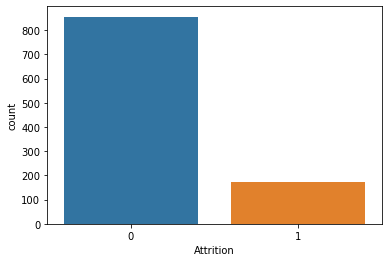

In [8]:
import seaborn as sns
sns.countplot(train_data['Attrition'])

In [9]:
train_data.info

<bound method DataFrame.info of       Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1023   56          0      Travel_Rarely       1255  Research & Development   
1024   47          0      Travel_Rarely        359  Research & Development   
1025   24          0      Travel_Rarely       1476                   Sales   
1026   32          0      Travel_Rarely        601                   Sales   
1027   34          0      Travel_Rarely        401  Research & Development   

      DistanceFromHome  Educati

In [10]:
train_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

In [11]:
train_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,...,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,806.551556,9.010700,2.873541,1.0,710.198444,2.719844,65.451362,2.731518,...,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051,513.500000
std,9.444297,0.373439,407.043735,8.078418,1.032840,0.0,418.513656,1.089614,20.274229,0.703240,...,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460,296.902341
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.750000,2.000000,2.000000,1.0,351.750000,2.000000,48.000000,2.000000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,256.750000
50%,36.000000,0.000000,813.000000,7.000000,3.000000,1.0,701.500000,3.000000,65.000000,3.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,513.500000
75%,43.000000,0.000000,1157.250000,13.000000,4.000000,1.0,1069.250000,4.000000,83.000000,3.000000,...,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,770.250000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1027.000000


In [12]:
train_data['EducationField'].replace('Life Sciences',1, inplace=True)
train_data['EducationField'].replace('Medical',2, inplace=True)
train_data['EducationField'].replace('Marketing', 3, inplace=True)
train_data['EducationField'].replace('Other',4, inplace=True)
train_data['EducationField'].replace('Technical Degree',5, inplace=True)
train_data['EducationField'].replace('Human Resources', 6, inplace=True)

train_data['EducationField'].value_counts()

1    427
2    320
3    119
5     90
4     57
6     15
Name: EducationField, dtype: int64

In [13]:
train_data['Department'].value_counts()

Research & Development    683
Sales                     309
Human Resources            36
Name: Department, dtype: int64

In [14]:
train_data['Department'].replace('Research & Development',1, inplace=True)
train_data['Department'].replace('Sales',2, inplace=True)
train_data['Department'].replace('Human Resources', 3, inplace=True)

In [15]:
print(train_data['Department'].value_counts())
print(train_data.head(10))

1    683
2    309
3     36
Name: Department, dtype: int64
   Age  Attrition     BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1      Travel_Rarely       1102           2                 1   
1   49          0  Travel_Frequently        279           1                 8   
2   37          1      Travel_Rarely       1373           1                 2   
3   33          0  Travel_Frequently       1392           1                 3   
4   27          0      Travel_Rarely        591           1                 2   
5   32          0  Travel_Frequently       1005           1                 2   
6   59          0      Travel_Rarely       1324           1                 3   
7   30          0      Travel_Rarely       1358           1                24   
8   38          0  Travel_Frequently        216           1                23   
9   36          0      Travel_Rarely       1299           1                27   

   Education  EducationField  EmployeeCount  Emplo

In [16]:
print(train_data['BusinessTravel'].value_counts())


Travel_Rarely        729
Travel_Frequently    197
Non-Travel           102
Name: BusinessTravel, dtype: int64


In [17]:
train_data['BusinessTravel'].replace('Travel_Rarely',1, inplace=True)
train_data['BusinessTravel'].replace('Travel_Frequently',2, inplace=True)
train_data['BusinessTravel'].replace('Non-Travel',3, inplace=True)

print(train_data['BusinessTravel'].value_counts())

1    729
2    197
3    102
Name: BusinessTravel, dtype: int64


In [18]:
train_data['Gender'].replace('Male',1, inplace=True)
train_data['Gender'].replace('Female',0, inplace=True)
train_data['Gender']

0       0
1       1
2       1
3       0
4       1
       ..
1023    0
1024    0
1025    0
1026    1
1027    0
Name: Gender, Length: 1028, dtype: int64

In [19]:
print(train_data['JobRole'].value_counts())
print(train_data['MaritalStatus'].value_counts())


Sales Executive              223
Research Scientist           209
Laboratory Technician        183
Manufacturing Director       105
Healthcare Representative     85
Manager                       79
Research Director             59
Sales Representative          57
Human Resources               28
Name: JobRole, dtype: int64
Married     454
Single      342
Divorced    232
Name: MaritalStatus, dtype: int64


In [20]:
train_data['JobRole'].replace('Sales Executive',1, inplace=True)
train_data['JobRole'].replace('Research Scientist',2, inplace=True)
train_data['JobRole'].replace('Laboratory Technician',3, inplace=True)
train_data['JobRole'].replace('Manufacturing Director',4, inplace=True)
train_data['JobRole'].replace('Healthcare Representative',5, inplace=True)
train_data['JobRole'].replace('Manager',6, inplace=True)
train_data['JobRole'].replace('Research Director',7, inplace=True)
train_data['JobRole'].replace('Sales Representative',8, inplace=True)
train_data['JobRole'].replace('Human Resources',9, inplace=True)


train_data['MaritalStatus'].replace('Married',1, inplace=True)
train_data['MaritalStatus'].replace('Single',2, inplace=True)
train_data['MaritalStatus'].replace('Divorced',3, inplace=True)


In [21]:
print(train_data['JobRole'].value_counts())
print(train_data['MaritalStatus'].value_counts())


1    223
2    209
3    183
4    105
5     85
6     79
7     59
8     57
9     28
Name: JobRole, dtype: int64
1    454
2    342
3    232
Name: MaritalStatus, dtype: int64


In [22]:
print(train_data['OverTime'].value_counts())

No     726
Yes    302
Name: OverTime, dtype: int64


In [23]:
train_data['OverTime'].replace('No',0, inplace=True)
train_data['OverTime'].replace('Yes',1, inplace=True)



In [24]:
print(train_data['OverTime'].value_counts())

0    726
1    302
Name: OverTime, dtype: int64


In [24]:
train_data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
Age,1.000000,-0.168641,-0.033011,0.010270,0.018594,-0.022883,0.181464,-0.014606,NaN,0.003173,...,0.061905,0.006998,0.691968,-0.002472,-0.028193,0.317744,0.209906,0.215766,0.194178,0.002749
Attrition,-0.168641,1.000000,-0.000368,-0.050566,0.043787,0.086875,-0.041021,0.057503,NaN,0.026833,...,-0.050263,-0.160597,-0.178842,-0.038728,-0.064322,-0.133021,-0.159691,-0.031826,-0.151208,0.026794
BusinessTravel,-0.033011,-0.000368,1.000000,0.005773,0.011713,0.071439,-0.010399,-0.066717,NaN,0.017198,...,0.019312,0.033016,-0.041053,-0.013066,0.037281,0.003224,-0.017333,0.025422,0.008753,0.017331
DailyRate,0.010270,-0.050566,0.005773,1.000000,-0.038888,0.023364,-0.049667,-0.046977,NaN,-0.072425,...,-0.023635,0.042857,0.028833,0.004617,-0.066313,-0.042520,0.005374,-0.041213,-0.037282,-0.072765
Department,0.018594,0.043787,0.011713,-0.038888,1.000000,-0.007454,0.013998,0.247329,NaN,0.029711,...,0.014480,-0.012860,0.009260,0.006563,0.088136,0.058146,0.043596,0.018241,0.044203,0.031382
DistanceFromHome,-0.022883,0.086875,0.071439,0.023364,-0.007454,1.000000,0.012416,-0.018583,NaN,0.008191,...,0.005861,0.043912,-0.025257,-0.007631,-0.053905,-0.029847,-0.004379,-0.008735,-0.004795,0.008636
Education,0.181464,-0.041021,-0.010399,-0.049667,0.013998,0.012416,1.000000,-0.003414,NaN,-0.002240,...,0.014048,-0.003790,0.133525,-0.036168,0.011091,0.061348,0.075898,0.072333,0.086565,-0.001705
EducationField,-0.014606,0.057503,-0.066717,-0.046977,0.247329,-0.018583,-0.003414,1.000000,NaN,0.003021,...,0.001606,-0.026509,-0.013993,0.023313,0.042978,-0.013093,-0.004420,-0.003254,0.006067,0.004031
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.003173,0.026833,0.017198,-0.072425,0.029711,0.008191,-0.002240,0.003021,NaN,1.000000,...,-0.093246,0.024540,0.018827,-0.007704,0.028360,0.012112,0.000836,0.005375,-0.010186,0.999796


In [25]:
train_data['Age_years'] = train_data['Age']
train_data= train_data.drop('Age', axis=1)
train_data= train_data.drop('EmployeeCount', axis=1)
train_data= train_data.drop('ID', axis=1)
train_data= train_data.drop('StockOptionLevel', axis=1)
train_data= train_data.drop('TrainingTimesLastYear', axis=1)

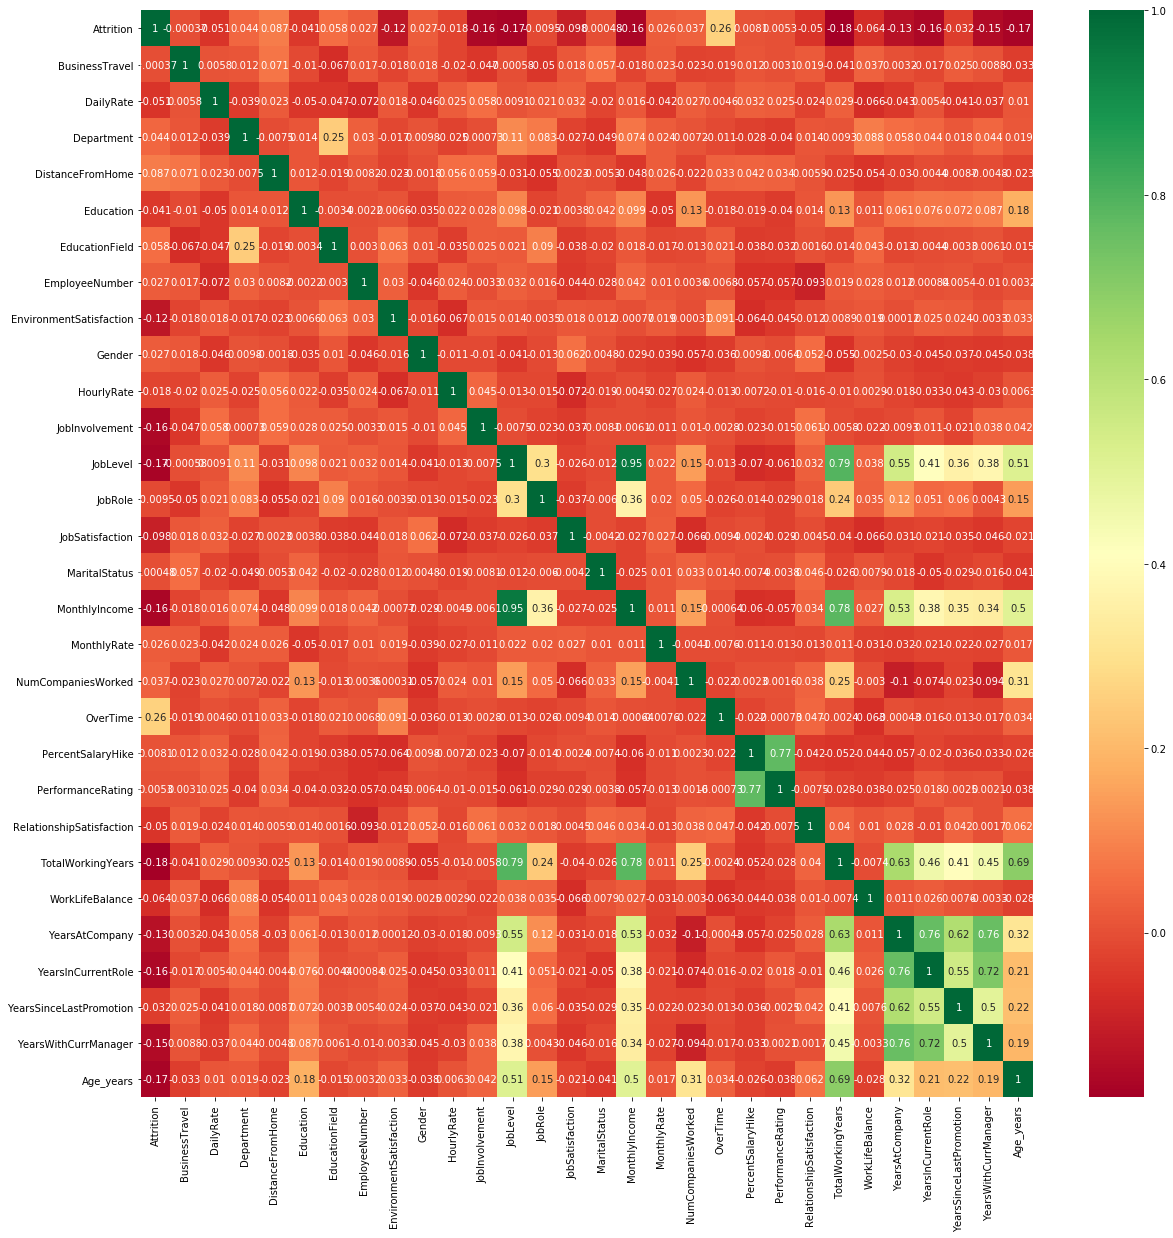

In [27]:
## correleation
import seaborn as sns
import matplotlib.pyplot as plt
corrmat= train_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(train_data[top_corr_features].corr(), annot = True, cmap="RdYlGn")

In [28]:
print(train_data)

      Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0             1               1       1102           2                 1   
1             0               2        279           1                 8   
2             1               1       1373           1                 2   
3             0               2       1392           1                 3   
4             0               1        591           1                 2   
...         ...             ...        ...         ...               ...   
1023          0               1       1255           1                 1   
1024          0               1        359           1                 2   
1025          0               1       1476           2                 4   
1026          0               1        601           2                 7   
1027          0               1        401           1                 1   

      Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  \
0          

In [29]:
X= train_data.iloc[:,1:train_data.shape[1]].values
Y= train_data.iloc[:,0].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .20, random_state=0)

In [38]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 2000, random_state = 50)
forest = RandomForestClassifier(n_estimators =10, criterion = 'entropy', random_state= 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [39]:
forest.score(X_train, Y_train)

0.9793187347931873

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('model test accuracy={}'.format((TP+TN)/ (TP+TN+FP+FN)) )


[[174   3]
 [ 24   5]]
model test accuracy=0.8689320388349514


In [35]:
from sklearn.model_selection import train_test_split
from sklearn import svm
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .30)


In [36]:
clfsvm = svm.SVC()
clfsvm.fit(x_train, y_train)
clfsvm.score(x_train, y_train)


0.8191933240611962

In [37]:
clfsvm.score(x_test, y_test)

0.8640776699029126